**Paso 4. Análisis exploratorio de datos (Python)**

In [2]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

### DataFrame C O M P A N Y

In [3]:
# Leemos el primer conjunto de datos en un DataFrame
company = pd.read_csv('/datasets/project_sql_result_01.csv')

# Imprimimos el head del df
print(company.head())

print("----------------------------------------------------------------")

# Imprimimos el shape del df
print(company.shape)

print("----------------------------------------------------------------")

# Imprimimos la información del df
print(company.info())

print("----------------------------------------------------------------")

# Imprimimos la estadística descritiva del df
print(company.describe())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
----------------------------------------------------------------
(64, 2)
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
----------------------------------------------------------------
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.00000

In [4]:
# Verificamos si hay valores nulos
print(company.isnull().sum())

company_name    0
trips_amount    0
dtype: int64


In [5]:
# Si queremos eliminar los datos usamos el siguiente código
# company_null = company.duplicated().sum()

In [6]:
# Tipos de datos

# Primero inspeccionamos los tipos actuales
print(company.dtypes)

company_name    object
trips_amount     int64
dtype: object


In [7]:
# Cambiamos el tipo de dato de la columna "company_name"
company['company_name'] = company['company_name'].astype('string')
print(company.dtypes)

company_name    string
trips_amount     int64
dtype: object


### DataFrame L O C A T I O N

In [8]:
# Leemos el conjunto de datos en un DataFrame
location = pd.read_csv('/datasets/project_sql_result_04.csv')

# Imprimimos el head del df
print(location.head())

print("----------------------------------------------------------------")

# Imprimimos el shape del df
print(location.shape)

print("----------------------------------------------------------------")

# Imprimimos la información del df
print(location.info())

print("----------------------------------------------------------------")

# Imprimimos la estadística descritiva del df
print(location.describe())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
----------------------------------------------------------------
(94, 2)
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
----------------------------------------------------------------
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


In [9]:
# Verificamos si hay valores nulos
print(location.isnull().sum())

dropoff_location_name    0
average_trips            0
dtype: int64


In [10]:
# Tipos de datos

# Primero inspeccionamos los tipos actuales
print(location.dtypes)

dropoff_location_name     object
average_trips            float64
dtype: object


In [11]:
# Cambiamos el tipo de dato de la columna "dropoff_location_name"
location['dropoff_location_name'] = location['dropoff_location_name'].astype('string')
print(location.dtypes)

dropoff_location_name     string
average_trips            float64
dtype: object


Identificación los 10 principales barrios en términos de finalización del recorrido

In [12]:
# Ordenar la tabla 'location' por el promedio de viajes en orden descendente
top_10_neighborhoods = location.sort_values(by='average_trips', ascending=False).head(10)

# Mostrar los resultados
print("Top 10 barrios con más finalizaciones de viajes:")
print(top_10_neighborhoods[['dropoff_location_name', 'average_trips']])

Top 10 barrios con más finalizaciones de viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


**Gráfico de empresas de taxis y número de viajes**

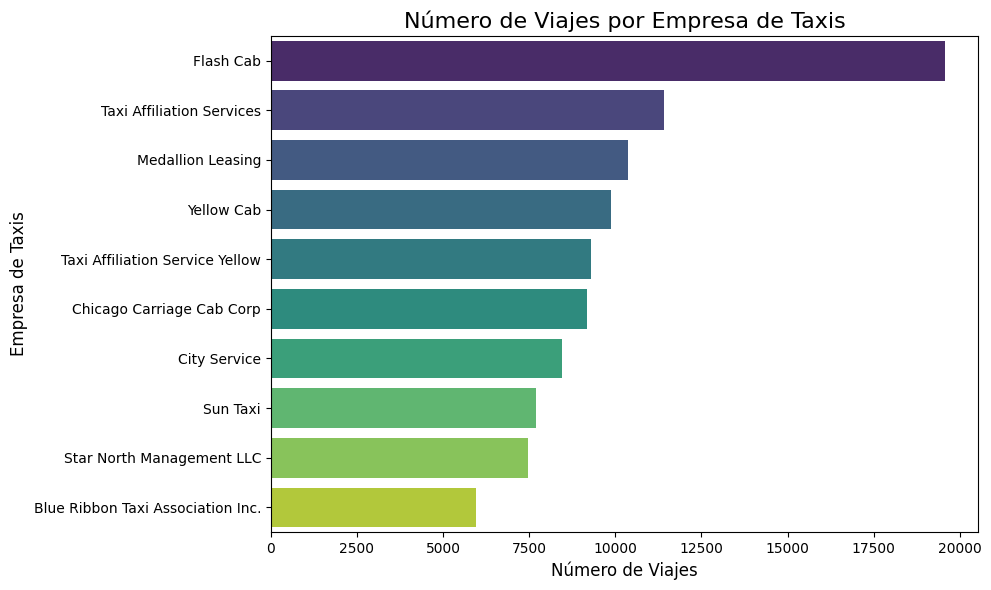

In [13]:
# Ordenar las empresas de taxis por número de viajes en orden descendente
company_sorted = company.sort_values(by='trips_amount', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=company_sorted, x='trips_amount', y='company_name', palette='viridis')

# Personalizar el gráfico
plt.title('Número de Viajes por Empresa de Taxis', fontsize=16)
plt.xlabel('Número de Viajes', fontsize=12)
plt.ylabel('Empresa de Taxis', fontsize=12)
plt.tight_layout()
plt.show()

Este gráfico muestra el número de viajes realizados por cada empresa de taxis en novimebre de 2017.

Al observarlo podemos notar que la empresa "Flash Cab" es la empresa dominante; es decir, con mayor número de viajes en este periodo de tiempo. Esto quiere decir que esta empresa tiene una mayor participación de mercado o es más eficiente en esos días específicos.

Las siguientes 4 empresas (Taxi Affiliation Services, Medallion Leasing, Yellow Cab y Taxi Affiliation Service Yellow) son la competencia; es decir, tienen viajes similares en este periodo de tiempo y le podrían competir a "Flash Cab" en cuanto a número de viajes. Si esta empresa se descuida, el mercado puede cambiar para alguna de estas 4 empresas.

A pesar de que la compañía "Flash Cab" tiene alrededor de 20,000 viajes en Noviembre, las 4 siguientes empresas rondan entre los 10,000 y 12,500 viajes al mes, lo que quiere decir que hay diversificación en cuanto a las empresas de taxis, excluyendo a la top 1. Si estas 4 empresas no logran diferenciarse del mercado, acabaran por ser detronadas.


**Gráfico de los 10 principales barrios por finalización**

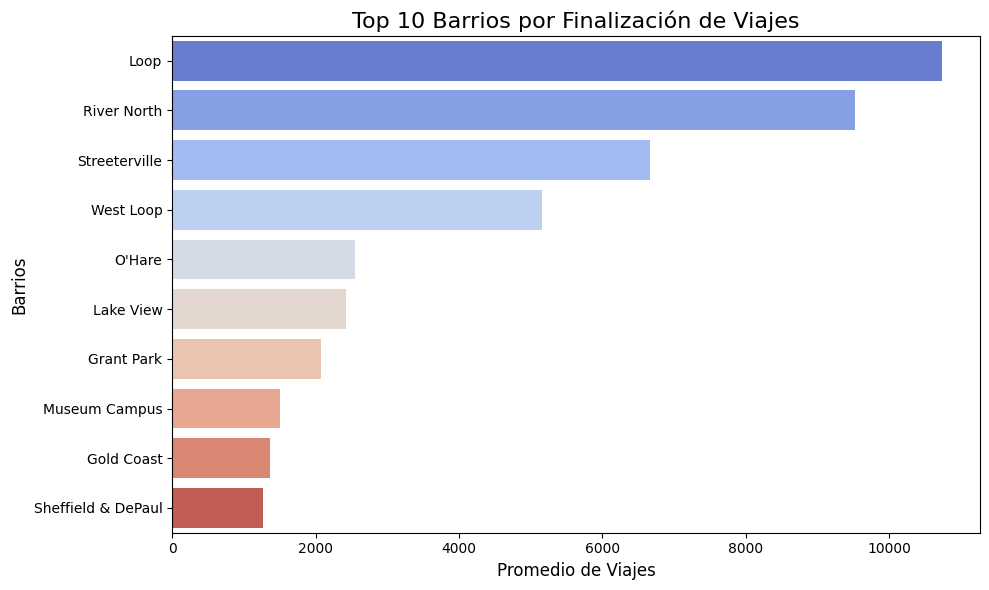

In [14]:
# Ordenar los barrios por promedio de viajes en orden descendente y tomar los 10 primeros
top_10_neighborhoods = location.sort_values(by='average_trips', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_neighborhoods, x='average_trips', y='dropoff_location_name', palette='coolwarm')

# Personalizar el gráfico
plt.title('Top 10 Barrios por Finalización de Viajes', fontsize=16)
plt.xlabel('Promedio de Viajes', fontsize=12)
plt.ylabel('Barrios', fontsize=12)
plt.tight_layout()
plt.show()

Este gráfico muestra los barrios con el mayor promedio de finalización de viajes durante noviembre de 2017.

Posibles Conclusiones:

Los barrios populares como Loop y River North pueden ser áreas con alta actividad comercial, turística o residencial. Aquí será cuestión de investigar si en efecto tienen alguno de estos temas que activen la demadna de taxis en la zona.

Además, puede que estos barrios top en viajes tengan preferencias de destino final como el trabajo de muchas personas. 

Por otro lado, los barrios con menor cantidad de viajes como Gold Coast o Sheffield & DePaul pueden ser barrios propensos a la delincuencia o simplmente barrios donde no hay necesidad de visitar debido a que no dan valor a los usuarios. 

Todo esto son suposiciones, para entender el comportamiento de estos barrios se deberá hacer un análisis más profundo para identificar los patrones y resultados obtenidos.

**Conclusiones Generales**

Ambos gráficos ofrecen una visión complementaria del mercado de taxis en Chicago:

Demanda por Compañías: El análisis de las empresas revela qué empresas dominan o cómo se distribuyen los viajes en un mercado competitivo.
Patrones de Destino: Los datos de los barrios reflejan la dinámica de movilidad urbana, ayudando a entender dónde están los focos de demanda y qué áreas son críticas para los servicios de transporte.

Estos insights podrían ser valiosos para:

Empresas de taxis, para optimizar la distribución de vehículos.
Urbanistas, para analizar patrones de movilidad.
Políticas públicas, para diseñar mejores infraestructuras de transporte.

**Paso 5. Prueba de hipótesis (Python)**

In [15]:
# Leemos el primer conjunto de datos en un DataFrame
viajes = pd.read_csv('/datasets/project_sql_result_07.csv')

# Imprimimos el head del df
print(viajes.head())

print("----------------------------------------------------------------")

# Imprimimos el shape del df
print(viajes.shape)

print("----------------------------------------------------------------")

# Imprimimos la información del df
print(viajes.info())

print("----------------------------------------------------------------")

# Imprimimos la estadística descritiva del df
print(viajes.describe())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
----------------------------------------------------------------
(1068, 3)
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
----------------------------------------------------------------
       duration_seconds
co

Prueba de Hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

**Planteamiento de las Hipótesis**

Hipótesis Nula (𝐻0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en los sábados lluviosos.
Matemáticamente:

𝐻
0
:
𝜇 sabados lluviosos = 𝜇 sabados no lluviosos

Hipótesis Alternativa (Ha): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos.
Matemáticamente:

𝐻𝑎 : 𝜇 sabados lluviosos ≠ 𝜇 sabados no lluviosos



Nivel de significación (
𝛼
α):
Elegiremos un 
𝛼
=
0.05
α=0.05 (nivel de confianza del 95%), que es estándar en análisis estadísticos. Esto significa que estamos dispuestos a aceptar un 5% de probabilidad de rechazar la hipótesis nula cuando es verdadera.

Criterio para Decisión:

Si el valor p de la prueba t es menor que 
𝛼
α, rechazamos 
𝐻
0
H 
0
​
 .
Si el valor p es mayor o igual a 
𝛼
α, no rechazamos 
𝐻
0
H 
0
​
 .

In [16]:
# Convertir 'start_ts' a formato datetime
viajes['start_ts'] = pd.to_datetime(viajes['start_ts'])

# Filtrar los datos para sábados
viajes['day_of_week'] = viajes['start_ts'].dt.day_name()
saturdays = viajes[viajes['day_of_week'] == 'Saturday']

# Separar sábados lluviosos y no lluviosos
# Verifica los valores únicos de 'weather_conditions'
print("Valores únicos en 'weather_conditions':", saturdays['weather_conditions'].unique())

# Filtrar según las condiciones reales en los datos
rainy_saturdays = saturdays[saturdays['weather_conditions'].str.contains('Bad', na=False)]['duration_seconds'].dropna()
non_rainy_saturdays = saturdays[saturdays['weather_conditions'].str.contains('Good', na=False)]['duration_seconds'].dropna()

Valores únicos en 'weather_conditions': ['Good' 'Bad']


In [17]:
# Definir el nivel de significancia
alpha = 0.05

# Prueba de Levene para evaluar la igualdad de varianzas
levene_test = stats.levene(rainy_saturdays, non_rainy_saturdays)
print('Prueba de Levene - valor p:', levene_test.pvalue)

# Verificación de la hipótesis nula de Levene
if levene_test.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
    equal_var = False
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    equal_var = True

# Prueba t de dos muestras considerando el resultado de Levene
results = stats.ttest_ind(rainy_saturdays, non_rainy_saturdays, equal_var=equal_var)

# Resultados
print('Prueba t - valor p:', results.pvalue)

# Verificación de la hipótesis nula
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en la duración promedio de los viajes en sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa en la duración promedio de los viajes en sábados lluviosos.")

Prueba de Levene - valor p: 0.5332038671974493
No podemos rechazar la hipótesis nula: Las varianzas son iguales.
Prueba t - valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula: Existe una diferencia significativa en la duración promedio de los viajes en sábados lluviosos.


Interpretación de los Resultados

Como 𝑝≥𝛼, podemos decir que hay evidencia suficiente para concluir que la lluvia afecta la duración promedio de los viajes los sábados.